Project 2:

The Real Problem

Recognizing multi-digit numbers in photographs captured at street level is an important

component of modern-day map making. A classic example of a corpus of such street

level photographs is Google’s Street View imagery comprised of hundreds of millions of

geo-located 360 degree panoramic images. The ability to automatically transcribe an

address number from a geo-located patch of pixels and associate the transcribed

number with a known street address helps pinpoint, with a high degree of accuracy, the

location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical

character recognition community. While OCR on constrained domains like document

processing is well studied, arbitrary multi-character text recognition in photographs is

still highly challenging. This difficulty arises due to the wide variability in the visual

appearance of text in the wild on account of a large range of fonts, colors, styles,

orientations, and character arrangements. The recognition problem is further

complicated by environmental factors such as lighting, shadows, specularities, and

occlusions as well as by image acquisition factors such as resolution, motion, and focus

blurs.

In this project we will use dataset with images centred around a single digit (many of the

images do contain some distractors at the sides). Although we are taking a sample of

the data which is simpler, it is more complex than MNIST because of the distractors.

 

The Street View House Numbers (SVHN) Dataset

SVHN is a real-world image dataset for developing machine learning and object

recognition algorithms with minimal requirement on data formatting but comes from a

significantly harder, unsolved, real world problem (recognizing digits and numbers in

natural scene images). SVHN is obtained from house numbers in Google Street View

images.

 

Link to the dataset:

https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

 

Acknowledgement for the datasets.

Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng

Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop

on Deep Learning and Unsupervised Feature Learning 2011. PDF

http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows: 

    Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 
    Data fetching and understand the train/val/test splits. (5 points)
    Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points) 
    Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (10 points) 
    Implement batch normalization for training the neural network (5 points) 
    Print the classification accuracy metrics (5 points) 


## Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages):



## Data fetching and understand the train/val/test splits.

In [121]:
%tensorflow_version 2.0
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0-rc1


In [0]:
import numpy as np
import pandas as pd

In [123]:
from google.colab import drive
import h5py

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/GreatLearning/myprojects/SVHN_single_grey1.h5'
df = h5py.File(root_path, 'r+')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


An HDF5 file is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is:

Groups work like dictionaries, and datasets work like NumPy arrays

As file object acts like a dictionary , printing keys below

Below few steps is an attempt to understand and visualize dataset

In [124]:
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

From above output it seems that there are 6 datasets in this file object.
Checking shape and dtype of these datasets.

In [125]:
print('Shape of X_train:',df['X_train'].shape)
print('Shape of X_test:',df['X_test'].shape)
print('Shape of X_val:',df['X_val'].shape)
print('Shape of y_train:',df['y_train'].shape)
print('Shape of y_test:',df['y_test'].shape)
print('Shape of y_val:',df['y_val'].shape)

Shape of X_train: (42000, 32, 32)
Shape of X_test: (18000, 32, 32)
Shape of X_val: (60000, 32, 32)
Shape of y_train: (42000,)
Shape of y_test: (18000,)
Shape of y_val: (60000,)


Above output shows that:

Data file contains gray scale images.

Training set has 42000 samples of 32x32 images.

Test set has 18000 samples of 32x32 images.

Validation set has 60000 samples of 32x32 images.

Also, as expected,
Training label set has labels for 42000 samples.

Test label set has labels for 18000 samples.

Validation label set has labels 60000 samples.

In [126]:
print('Data type of X_train:',df['X_train'].dtype)
print('Data type of X_test:',df['X_test'].dtype)
print('Data type of X_val:',df['X_val'].dtype)
print('Data type of y_train:',df['y_train'].dtype)
print('Data type of y_test:',df['y_test'].dtype)
print('Data type of y_val:',df['y_val'].dtype)

Data type of X_train: float32
Data type of X_test: float32
Data type of X_val: float32
Data type of y_train: uint8
Data type of y_test: uint8
Data type of y_val: uint8


In [0]:
#Storing each dataset extracted from HDF5 file for processing
X_train_dataset = df['X_train']
X_test_dataset = df['X_test']
y_train_dataset = df['y_train']
y_test_dataset = df['y_test']
X_val_dataset = df['X_val']
y_val_dataset = df['y_val']

In [128]:
#Checking to confirm the dataset type in hdf5 file
print('Type for X_train_dataset: ', type(X_train_dataset))
print('Type for X_test_dataset: ', type(X_test_dataset))
print('Type for X_val_dataset: ', type(X_val_dataset))
print('Type for y_train_dataset: ', type(y_train_dataset))
print('Type for y_test_dataset: ', type(y_test_dataset))
print('Type for y_val_dataset: ', type(y_val_dataset))

Type for X_train_dataset:  <class 'h5py._hl.dataset.Dataset'>
Type for X_test_dataset:  <class 'h5py._hl.dataset.Dataset'>
Type for X_val_dataset:  <class 'h5py._hl.dataset.Dataset'>
Type for y_train_dataset:  <class 'h5py._hl.dataset.Dataset'>
Type for y_test_dataset:  <class 'h5py._hl.dataset.Dataset'>
Type for y_val_dataset:  <class 'h5py._hl.dataset.Dataset'>


In [129]:
print(X_train_dataset)
print(X_test_dataset)
print(X_val_dataset)
print(y_train_dataset)
print(y_test_dataset)
print(y_val_dataset)

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">
<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">
<HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">
<HDF5 dataset "y_train": shape (42000,), type "|u1">
<HDF5 dataset "y_test": shape (18000,), type "|u1">
<HDF5 dataset "y_val": shape (60000,), type "|u1">


In [130]:
#Checking Unique number of labels in the training data
np.unique(y_train_dataset)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

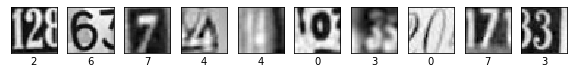

In [131]:
#plotting first 10 images in training sample
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_dataset[i], cmap='gray')
    plt.xlabel(y_train_dataset[i])
plt.show()

Below few steps is to preprocess the dataset to be used to build Neural Network model

In [0]:
#Applying one-hot encoding on train, test and validation set labels
trainY = tf.keras.utils.to_categorical(y_train_dataset, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test_dataset, num_classes=10)
valY = tf.keras.utils.to_categorical(y_val_dataset, num_classes=10)

In [0]:
#Converting fetched dataset into numpy array of data type float32 for compatibility with Keras
X_train_norm = np.array(X_train_dataset).astype('float32')
X_test_norm = np.array(X_test_dataset).astype('float32')
X_val_norm = np.array(X_val_dataset).astype('float32')

In [0]:
X_train_norm = X_train_norm / 255.0
X_test_norm = X_test_norm / 255.0
X_val_norm = X_val_norm / 255.0

## Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

## Implement batch normalization for training the neural network



In [0]:
#Importing required keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Reshape, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPool2D, Flatten

In [0]:
clear_session()
# Initializing the DNN model
model = Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(Reshape((1024,),input_shape=(32,32,)))

# BatchNormalization layer
model.add(BatchNormalization())

# Add second hidden layer
model.add(Dense(units=100, activation = 'relu')) 

# BatchNormalization layer
model.add(BatchNormalization())

# Adding the output layer
# We use the softmax to get probability outcomes for multi-class
model.add(Dense(units=10, activation = 'softmax'))


##Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [0]:
# Create optimizer with learning rate of 0.01
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 108,006
Trainable params: 105,758
Non-trainable params: 2,248
_________________________________________________________________


In [139]:
model.fit(X_train_norm, trainY, validation_data=(X_val_norm, valY), batch_size=32, epochs=50)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 9s 206us/sample - loss: 1.6987 - accuracy: 0.4420 - val_loss: 1.2544 - val_accuracy: 0.6240
Epoch 2/50
42000/42000 [==============================] - 8s 193us/sample - loss: 1.2340 - accuracy: 0.6187 - val_loss: 0.9977 - val_accuracy: 0.7147
Epoch 3/50
42000/42000 [==============================] - 8s 193us/sample - loss: 1.0918 - accuracy: 0.6646 - val_loss: 0.8984 - val_accuracy: 0.7424
Epoch 4/50
42000/42000 [==============================] - 8s 189us/sample - loss: 1.0106 - accuracy: 0.6854 - val_loss: 0.8425 - val_accuracy: 0.7585
Epoch 5/50
42000/42000 [==============================] - 8s 193us/sample - loss: 0.9482 - accuracy: 0.7070 - val_loss: 0.8183 - val_accuracy: 0.7563
Epoch 6/50
42000/42000 [==============================] - 8s 197us/sample - loss: 0.9056 - accuracy: 0.7185 - val_loss: 0.7349 - val_accuracy: 0.7920
Epoch 7/50
42000/42000 [==========================

## Print the classification accuracy metrics

In [140]:
print('Model Evaluation on test data: ')
results = model.evaluate(X_test_norm, testY, verbose=0)
print('Test loss, Test Accuracy : ', results)

Model Evaluation on test data: 
Test loss, Test Accuracy :  [0.5438535475201077, 0.85294443]


In [0]:
#Predict values for test dataset
predY1 = model.predict(X_test_norm)

In [0]:
#Applying threshold to predicted values
predY = predY1 > 0.5

In [143]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report:')
cr = classification_report(testY,predY)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1814
           1       0.90      0.81      0.85      1828
           2       0.94      0.82      0.88      1803
           3       0.89      0.76      0.82      1719
           4       0.93      0.84      0.88      1812
           5       0.90      0.80      0.85      1768
           6       0.93      0.75      0.83      1832
           7       0.92      0.85      0.89      1808
           8       0.93      0.71      0.81      1812
           9       0.90      0.77      0.83      1804

   micro avg       0.92      0.80      0.85     18000
   macro avg       0.92      0.80      0.85     18000
weighted avg       0.92      0.80      0.85     18000
 samples avg       0.80      0.80      0.80     18000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Below few steps to visualize predicted values

In [144]:
print(predY1)

[[1.18384458e-01 5.90180218e-01 6.45905957e-02 ... 7.84393772e-02
  3.55518311e-02 4.28838581e-02]
 [1.00894822e-05 2.14108080e-03 2.97328115e-01 ... 6.96647882e-01
  8.83970642e-05 1.81302657e-05]
 [1.10711617e-05 1.58994571e-05 9.98565018e-01 ... 1.05366125e-04
  9.43897525e-04 1.49810745e-04]
 ...
 [2.60511320e-06 5.53806033e-03 4.89297963e-04 ... 9.93653178e-01
  1.11745258e-05 6.16237867e-06]
 [1.18893934e-02 8.32275196e-04 1.57410221e-03 ... 9.93283279e-03
  4.50716093e-02 7.75191963e-01]
 [7.40401156e-04 5.22755506e-03 9.69488621e-01 ... 4.40812809e-03
  5.95301914e-04 9.18960141e-05]]


In [145]:
print(predY)

[[False  True False ... False False False]
 [False False False ...  True False False]
 [False False  True ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False False  True]
 [False False  True ... False False False]]


In [0]:
#Storing predicted values in ndarray into array of predicted labels
predY_array = np.argmax(predY, axis=1)

Predicted labels for first ten images in test set


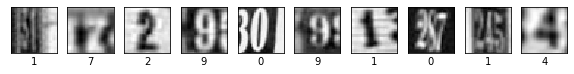

In [147]:
#plotting first 10 images in test sample with predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
print('Predicted labels for first ten images in test set')
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_dataset[i], cmap='gray')
    plt.xlabel(predY_array[i])
plt.show()

In [148]:
print('Actual labels for first ten images in test set')
for i in range(10):
  print(np.argmax(testY[i]))
print('Predicted labels for first ten images in test set:')
for i in range(10):
  print(predY_array[i])

Actual labels for first ten images in test set
1
7
2
9
0
9
1
8
4
4
Predicted labels for first ten images in test set:
1
7
2
9
0
9
1
0
1
4


Above plot depicts the predicted values of first 10 images in test set with the model built and test accuracy of around 85%

Apparently most of the values are predicted correctly, except two in first 10 images.



Few pointers for model optimization,

1.Number of hidden layer and number of neurons in each hidden layer can be adjusted.

2.Batch normalization layer can be added.

3.Dropout layer can be added

3.selection of optimizer

4.value initialization

5.parameter tuning for selected optimizer

Building model below with dropout layer and adam optimizer

In [0]:
clear_session()
# Initializing the DNN model
model1 = Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model1.add(Reshape((1024,),input_shape=(32,32,)))

# BatchNormalization layer
model1.add(BatchNormalization())

# Add second hidden layer
model1.add(Dense(units=100, activation = 'relu')) 

# BatchNormalization layer
model1.add(BatchNormalization())

# Dropout layer
model1.add(Dropout(rate=0.3))

# Adding the output layer
# We use the softmax to get probability outcomes for multi-class
model1.add(Dense(units=10, activation = 'softmax'))

model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [150]:
model1.fit(X_train_norm, trainY, validation_data=(X_val_norm, valY), batch_size=32, epochs=50)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 10s 233us/sample - loss: 1.7631 - accuracy: 0.4095 - val_loss: 1.1660 - val_accuracy: 0.6560
Epoch 2/50
42000/42000 [==============================] - 9s 211us/sample - loss: 1.3325 - accuracy: 0.5696 - val_loss: 0.9859 - val_accuracy: 0.7216
Epoch 3/50
42000/42000 [==============================] - 9s 207us/sample - loss: 1.2025 - accuracy: 0.6181 - val_loss: 0.8820 - val_accuracy: 0.7587
Epoch 4/50
42000/42000 [==============================] - 9s 207us/sample - loss: 1.1415 - accuracy: 0.6387 - val_loss: 0.8097 - val_accuracy: 0.7857
Epoch 5/50
42000/42000 [==============================] - 9s 207us/sample - loss: 1.0901 - accuracy: 0.6577 - val_loss: 0.7786 - val_accuracy: 0.7933
Epoch 6/50
42000/42000 [==============================] - 9s 211us/sample - loss: 1.0568 - accuracy: 0.6681 - val_loss: 0.7605 - val_accuracy: 0.7947
Epoch 7/50
42000/42000 [=========================

In [151]:
print('Model Evaluation on test data: ')
results = model1.evaluate(X_test_norm, testY, verbose=0)
print('Test loss, Test Accuracy : ', results)

Model Evaluation on test data: 
Test loss, Test Accuracy :  [0.5990686042043898, 0.8452778]


On changing optimizer to adam and Dropout layer, no significant improvement is observed.

##Building CNN below to check accuracy changes

In [0]:
clear_session()
# Initializing the CNN model
model2 = Sequential()

#Reshape data from 2D to 3D -> 32x32 to 32x32x1
model2.add(Reshape((32,32,1),input_shape=(32,32,)))

# BatchNormalization layer
model2.add(BatchNormalization())

In [0]:
### Apply Convolutional Layers, MaxPooling
#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                activation='relu'))

#Add second convolutional layer
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model2.add(MaxPool2D(pool_size=(2,2)))

#Flatten the output
model2.add(Flatten())

# Adding the output layer
# We use the softmax to get probability outcomes for multi-class
model2.add(Dense(units=10, activation = 'softmax'))

In [0]:
# Create optimizer with learning rate of 0.01
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

model2.compile(optimizer=sgd_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [155]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [156]:
model2.fit(X_train_norm, trainY, validation_data=(X_val_norm, valY), batch_size=32, epochs=10)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 176s 4ms/sample - loss: 1.7433 - accuracy: 0.4122 - val_loss: 0.8236 - val_accuracy: 0.7614
Epoch 2/10
42000/42000 [==============================] - 177s 4ms/sample - loss: 0.6629 - accuracy: 0.8088 - val_loss: 0.5961 - val_accuracy: 0.8291
Epoch 3/10
42000/42000 [==============================] - 176s 4ms/sample - loss: 0.5469 - accuracy: 0.8465 - val_loss: 0.5037 - val_accuracy: 0.8632
Epoch 4/10
42000/42000 [==============================] - 177s 4ms/sample - loss: 0.4937 - accuracy: 0.8613 - val_loss: 0.4858 - val_accuracy: 0.8646
Epoch 5/10
42000/42000 [==============================] - 176s 4ms/sample - loss: 0.4516 - accuracy: 0.8744 - val_loss: 0.4355 - val_accuracy: 0.8817
Epoch 6/10
42000/42000 [==============================] - 180s 4ms/sample - loss: 0.4144 - accuracy: 0.8831 - val_loss: 0.4286 - val_accuracy: 0.8803
Epoch 7/10
42000/42000 [==========================

Apparently, Convolutional Neural Network model seems to converge faster with same number of epochs and batch size with improved validation accuracy. Model is evaluated below with test data.

In [157]:
print('Model Evaluation on test data: ')
results = model2.evaluate(X_test_norm, testY, verbose=0)
print('Test loss, Test Accuracy : ', results)

Model Evaluation on test data: 
Test loss, Test Accuracy :  [0.4844819337791867, 0.87722224]


CNN provides better accuracy on test data.

Classifying test data below with CNN model built.

In [0]:
#Predict values for test dataset
predY1 = model2.predict(X_test_norm)

#Applying threshold to predicted values
predY = predY1 > 0.5

#Storing predicted values in ndarray into array of predicted labels
predY_array = np.argmax(predY, axis=1)

Predicted labels for first ten images in test set


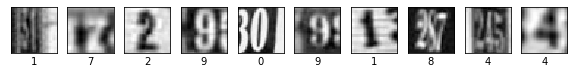

In [159]:
#plotting first 10 images in test sample with predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
print('Predicted labels for first ten images in test set')
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_dataset[i], cmap='gray')
    plt.xlabel(predY_array[i])
plt.show()

In [160]:
print('Actual labels for first ten images in test set')
for i in range(10):
  print(np.argmax(testY[i]))
print('Predicted labels for first ten images in test set:')
for i in range(10):
  print(predY_array[i])

Actual labels for first ten images in test set
1
7
2
9
0
9
1
8
4
4
Predicted labels for first ten images in test set:
1
7
2
9
0
9
1
8
4
4


From above predicted labels, CNN seems to have better classification results on test data